In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import torch
from src.d05_regression_model import Trainer

torch.use_deterministic_algorithms(True) 


In [2]:
trainer = Trainer('cuda', tracking=True, experiment='Assembly Inspector Counter')

In [ ]:
#model = trainer.train_model(folder='./data/temp/counting_imgs/screwdriver/scale_0.35', part='screwdriver', num_in_assembly=1)

In [3]:
model = trainer.train_model(folder='./data/temp/counting_imgs/wheels_five/scale_0.2', part='screw', num_in_assembly=5)

Training...
Unsuccessful training with final 2462 errors


Registered model '._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter' already exists. Creating a new version of this model...
Created version '29' of model '._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter'.


🏃 View run ._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter at: http://127.0.0.1:8080/#/experiments/328240355732496405/runs/0959dac398644002bd03d156b90f2f38
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/328240355732496405


In [4]:
import torch
tensor = torch.tensor([[1.4769]])
tensor.view(-1)

tensor([1.4769])

In [3]:
dls = trainer.get_dataloaders('./data/temp/counting_imgs/wheels_five/scale_0.2/screw', [1, 672, 378], 1, 'screw')

[357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,

In [23]:
trgs = []
for _,y in dls['assembly']:
    trgs += y.unique().tolist()

set(trgs)

{0, 78}

In [22]:
trgs = []
for _,y in dls['train'][-1]:
    trgs += y.unique().tolist()

set(trgs)

{0}

In [20]:
preds = []
ys =[]
model.eval()
with torch.no_grad():
    for X, y in dls["assembly"]:
        ys.append(y)
        X = X.to('cuda')
        pred = model(X).squeeze()
        preds.append(pred)

In [ ]:
preds_lst = []
for pred in preds:
    preds_lst+=(preds[0].tolist())


In [27]:
dls["assembly"].dataset.dataset[0][1] = 32
dls["assembly"].dataset.dataset[0][1]

TypeError: 'tuple' object does not support item assignment

(array([ 98.,  98.,  98.,   0.,   0.,   0.,  98.,   0., 392., 784.]),
 array([2.23133588, 2.30396211, 2.37658834, 2.44921458, 2.52184081,
        2.59446704, 2.66709328, 2.73971951, 2.81234574, 2.88497198,
        2.95759821]),
 <BarContainer object of 10 artists>)

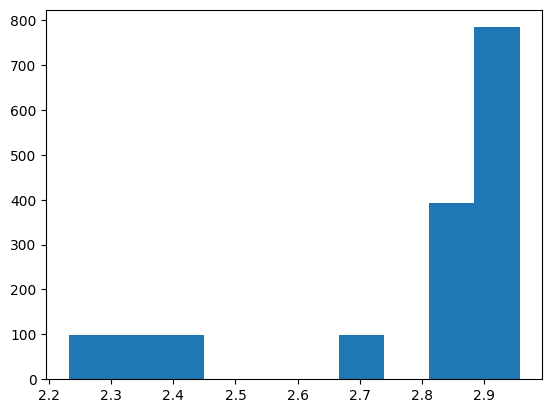

In [19]:
import matplotlib.pyplot as plt

plt.hist(preds_lst)